# FrozenLake

Using Q-Learning to beat the FrozenLake game. 

In [1]:
%matplotlib notebook

import gym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
env = gym.make('FrozenLake-v0')

In [3]:
#env.observation_space.n is the total number of states being observed.
#env.action_space is the total number of actions available.
#Matrix Q is being used to store outcome values of the actions in each states. 
Q = np.zeros([env.observation_space.n,env.action_space.n])

# Set learning parameters
learningRate = .8
discountFactor = .95
num_episodes = 10000

#create lists to contain all rewards
rewardList = [] #contains all rewards

for i in range(num_episodes):
    state = env.reset() #Each episode starts from the initial state
    thisEpisodesRewards = 0 
    done = False #Can later be change by environment
    
    #Makes sure every episode just plays 100 steps
    while not done:
        
        #finds action that returns maximum value for current state
        a = np.argmax(Q[state,:] + np.random.randn(1,env.action_space.n)*(1./(i+1))) 
        
        #Gets values from performing the above prefered action
        nextState,reward,done,_ = env.step(a)
        
        #Adds values in to Q-matrix with an predefined learning rate
        Q[state,a] = Q[state,a] + learningRate*(reward + discountFactor*np.max(Q[nextState,:]) - Q[state,a])
        
        thisEpisodesRewards += reward
        state = nextState
        if done == True:
            break
    rewardList.append(thisEpisodesRewards)

<IPython.core.display.Javascript object>


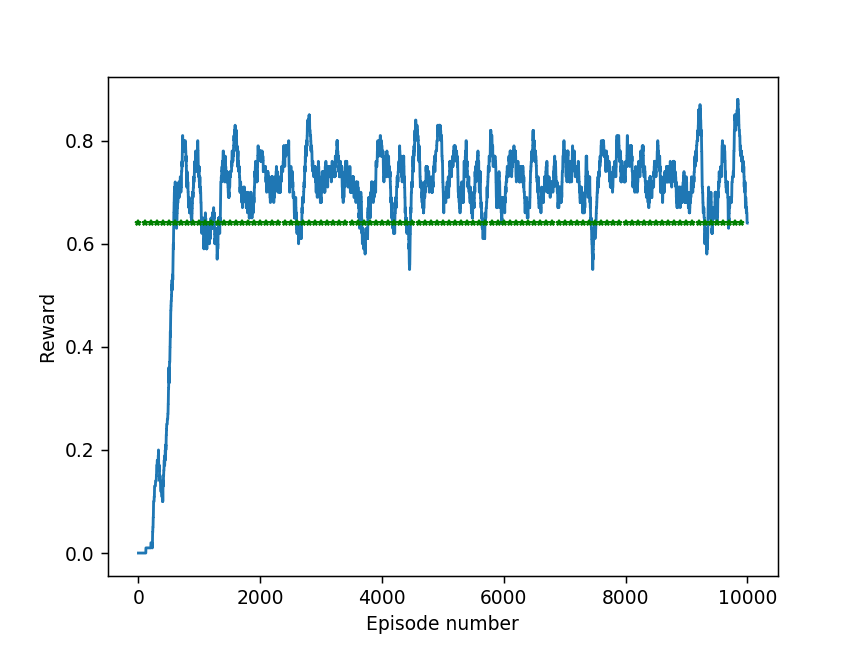

Average score over all episodes:  0.6909
Average score the last 100 episodes:  0.64


In [4]:
# Printing Numbers
currentAverage = 0
dividedAverage = 0
totalAverage = sum(rewardList)/len(rewardList)
newList = [] #Used to plot average over last 100s

#To calculate average over first 100 Numbers
for i in range(100):
    currentAverage += rewardList[i]
    dividedAverage = currentAverage/(i+1) 
    newList.append(dividedAverage)

#For the rest of the numbers, calculate average with last 100 numbers
for i in range(100, len(rewardList)-1):
    currentAverage += rewardList[i]
    currentAverage -= rewardList[i-100]
    dividedAverage = currentAverage/100 
    newList.append(dividedAverage) 

#Plotting the list    
plt.plot(newList) 

#Plotting the average of the last 100
plotting = int(num_episodes/100)
for i in range(plotting):
    plt.plot(100*i,dividedAverage, color='green', marker='*', linestyle='dashed', linewidth=2, markersize=3) 
    
print("Average score over all episodes: ", totalAverage)
print("Average score the last 100 episodes: ", dividedAverage)

plt.ylabel('Reward')
plt.xlabel('Episode number')

plt.show()
plt.savefig('FrozenLakePlot.png')

In [5]:
print ("Final Q Values")
print (Q)

Final Q Values
[[4.39813984e-01 7.78210630e-03 6.08967360e-03 5.92239675e-03]
 [4.76876964e-04 1.89316985e-03 1.53661069e-03 3.63537407e-01]
 [7.12095871e-02 3.95140058e-03 6.00109636e-03 5.53741505e-03]
 [1.14519730e-03 1.23726982e-03 9.82108239e-04 8.34972485e-03]
 [3.82035079e-01 2.72209926e-04 0.00000000e+00 7.59267531e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.28397305e-02 4.60500285e-05 4.84833327e-08 1.75501953e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.62046065e-04 3.25908514e-03 0.00000000e+00 5.45320287e-01]
 [1.68126039e-03 2.33723813e-01 9.25106139e-04 5.49040247e-04]
 [7.99640602e-02 3.76886631e-04 1.11228047e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.12629864e-03 1.19136996e-03 2.61613785e-01 7.72094700e-05]
 [0.00000000e+00 6.63049116e-01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.000000